## Gif

In [210]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gif

gif.options.matplotlib["dpi"] = 300

In [230]:
def create_data(num_groups=3, num_points=100, seed=2021): 
    np.random.seed(seed)
    XX, YY, L = np.array([]), np.array([]), np.array([])
    for i in range(num_groups):
        mean = [np.random.random()*10, np.random.random()*10]
        covariance = [
            [1 + np.random.random(), np.random.random() - 1],
            [0, 1 + np.random.random()],
        ]
        covariance[1][0] = covariance[0][1]
        x, y = np.random.multivariate_normal(mean, covariance, num_points).T
        l = np.ones(len(x)) * i
        XX, YY, L = np.hstack([XX, x]), np.hstack([YY, y]), np.hstack([L, l])
    return XX, YY, L

x, y, l = create_data(num_groups=2)

data = pd.DataFrame({'x': x, 'y': y, 'label': l.astype(np.int)})

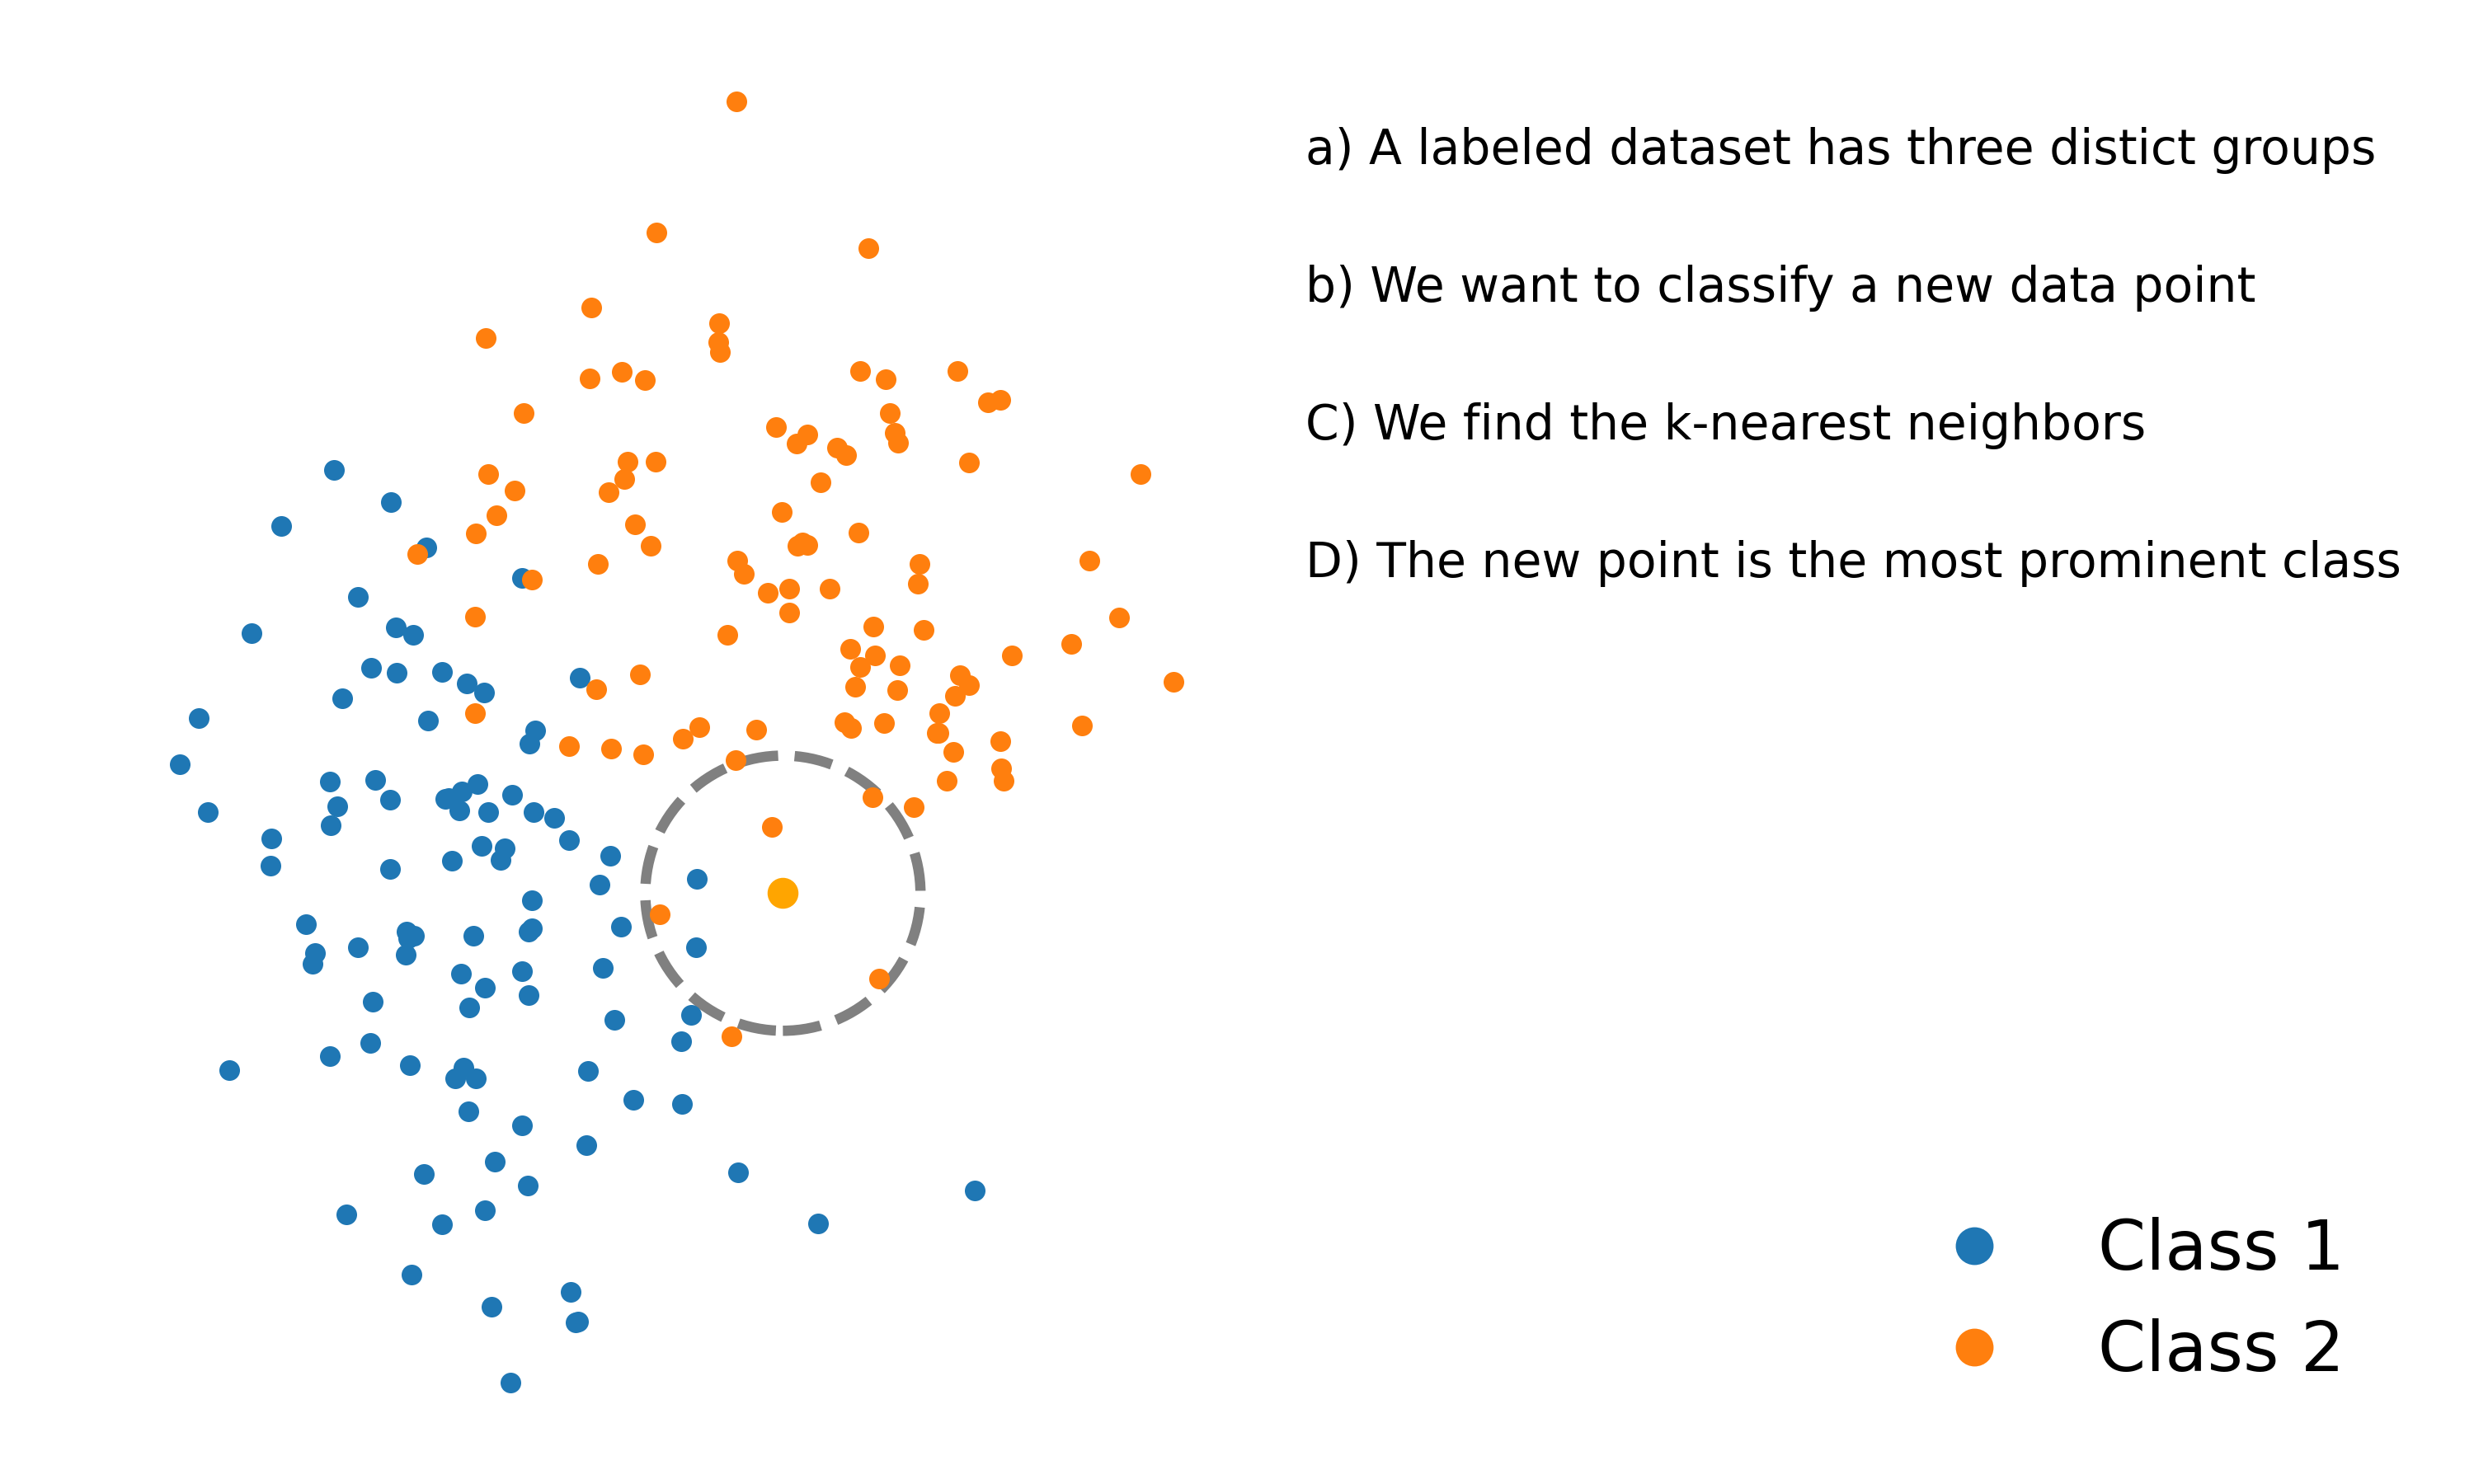

In [252]:
@gif.frame
def plot(frame=0, new_point=(8.2, 7.7), fontsize=14):
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.set_aspect('equal')
    plt.axis('off')

    fig.tight_layout()
    # base frame
    for group, group_data in data.groupby('label'):
        plt.plot(group_data.x, group_data.y, 'o', ms=5, label=f'Class {group + 1}')
    plt.text(12, 13, 'a) A labeled dataset has three distict groups', fontsize=fontsize)
    lgd = ax.legend(loc=4, fontsize=20, frameon=False, markerscale=2)
    xlim = ax.set_xlim([3, 20])    
    
    # frame 2
    if frame > 0:
        point = ax.plot(new_point[0], new_point[1], 'or', ms=8)
        plt.text(12, 12, 'b) We want to classify a new data point', fontsize=fontsize)
     
    # frame 3
    if frame > 1:
        circle = plt.Circle(new_point, 1, linestyle='--', lw=3, color='gray', fill=False)
        ax.add_artist(circle)
        plt.text(12, 11, 'C) We find the k-nearest neighbors', fontsize=fontsize)
        
    # frame 4
    if frame > 2:
        point[0].set_color('orange')
        plt.text(12, 10, 'D) The new point is the most prominent class', fontsize=fontsize)
    
    return fig

plot(frame=100)

In [255]:
frames = []
for i in range(4):
    frame = plot(i)
    frames.append(frame)
frames.append(frame)

In [256]:
gif.save(frames, 'KNN-example.gif', duration=len(frames)*2.5, unit="s", between="startend")